# Machine Learning 28: Random Forest Regression

### 1. What Is Random Forest Regression?

Random Forest Regression is an **ensemble learning method** that builds multiple decision trees and merges their predictions to improve accuracy and control overfitting. It’s used for **predicting continuous outcomes**.

### 2. Core Concepts

- **Decision Tree Regression**: A tree splits data into regions and fits a constant value (usually the mean) in each region.
- **Ensemble Learning**: Combines multiple models to produce a stronger overall model.
- **Bagging (Bootstrap Aggregating)**: Each tree is trained on a random subset of the data (with replacement).
- **Random Feature Selection**: At each split, a random subset of features is considered—this adds diversity to the trees.

### 3. How It Works (Step-by-Step)

1. **Data Sampling**: Create multiple bootstrapped datasets from the original training data.
2. **Tree Building**:
   - For each dataset, build a decision tree.
   - At each node, randomly select a subset of features to determine the best split.
3. **Prediction**:
   - For regression, each tree outputs a numerical value.
   - The final prediction is the **average** of all tree outputs.

### 4. Key Parameters

| Parameter             | Description |
|----------------------|-------------|
| `n_estimators`        | Number of trees in the forest |
| `max_features`        | Number of features to consider at each split |
| `max_depth`           | Maximum depth of each tree |
| `min_samples_split`   | Minimum samples required to split a node |
| `min_samples_leaf`    | Minimum samples required at a leaf node |
| `bootstrap`           | Whether to use bootstrapped samples |

### 5. Advantages

-  Handles non-linear relationships well
-  Robust to outliers and noise
-  Reduces overfitting compared to single decision trees
-  Works well with large datasets and high-dimensional data

### 6. Limitations

- Can be computationally intensive
- Less interpretable than a single decision tree
- May not perform well on extrapolation tasks (outside training range)

### 7. Evaluation Metrics

For regression tasks, common metrics include:

- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **R² Score (Coefficient of Determination)**

### 8. Practical Tips

- Normalize or scale features if using models alongside Random Forest.
- Use **feature importance** to understand which variables influence predictions.
- Tune hyperparameters using **Grid Search** or **Random Search** for optimal performance.

### 9. Variants & Extensions

- **Extra Trees (Extremely Randomized Trees)**: More randomness in splits for faster training.
- **Gradient Boosted Trees**: Sequentially builds trees to correct errors of previous ones.
- **Random Forest for Classification**: Same structure, but outputs class labels instead of continuous values.

### 10. Intuition Behind the Magic

Imagine asking 100 experts to estimate the price of a house. Each expert uses different criteria and data. Averaging their estimates gives a more reliable prediction than relying on just one. That’s Random Forest in a nutshell.


In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# load the data
df = pd.read_csv('Salary_Data.csv')

# drop columns
df.drop(columns=['Age', 'Gender', 'Education Level'], inplace=True)

df.head()


,Job Title,Years of Experience,Salary
0,Software Engineer,5.0,90000.0
1,Data Analyst,3.0,65000.0
2,Senior Manager,15.0,150000.0
3,Sales Associate,7.0,60000.0
4,Director,20.0,200000.0


In [3]:
df.isnull().sum()

Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
# USe random Forest for Regression task
X = df.iloc[:, 1:2].values # independent features
y = df.iloc[:, 2].values   # dependent feature

In [6]:
#create, train and predict the model
model_reg = RandomForestRegressor(random_state=0)
model_reg.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = model_reg.predict([[0]])
y_pred

array([29688.92519769])

In [8]:
# evaluate the model
print('mean squared error: ', mean_squared_error(X,y))
print('mean absolute error: ', mean_absolute_error(X,y))
print('r2 score: ', r2_score(X,y))
print('root mean squared error: ', np.sqrt(mean_squared_error(X,y)))

mean squared error:  16083889567.54385
mean absolute error:  115318.8697566801
r2 score:  -438058062.38623786
root mean squared error:  126822.27551792252


C:\Users\User\AppData\Local\Temp\ipykernel_8364\3502793579.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_gird = np.arange(min(X), max(X), 0.01)  # for higher resolution and smoother curve


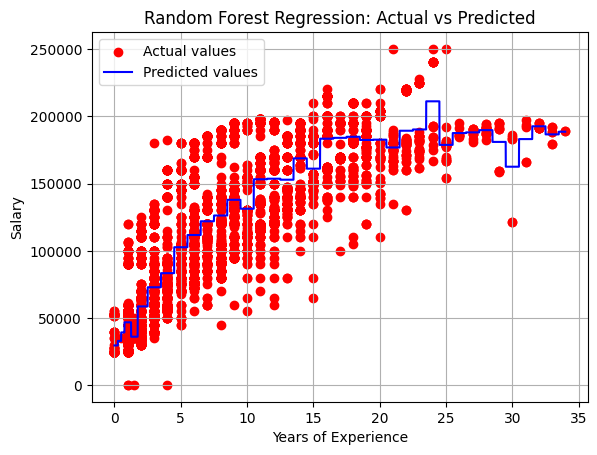

In [9]:
#visualize the results

x_gird = np.arange(min(X), max(X), 0.01)  # for higher resolution and smoother curve
x_gird = x_gird.reshape((-1, 1))
y_pred = model_reg.predict(x_gird)
plt.scatter(X, y, color='red', label='Actual values')
plt.plot(x_gird, y_pred, color='blue', label='Predicted values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()